<a href="https://colab.research.google.com/github/Tauheed-a21/machine-learning/blob/main/sentiment%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset loaded successfully!
📏 Dataset shape: (6900, 2)
                                            Comments  Ratings
0  Disclaimer: this film is only intended for sla...        7
1  I try to rate films for what they're suppose t...        6
2  In a violent nature is a slasher film shot mos...        5
3  Decent concept that just turns out insanely bo...        7
4  This was scary, suspenseful, graphic and funny...        3

💬 Unique sentiment values: ['Positive' 'Neutral' 'Negative']


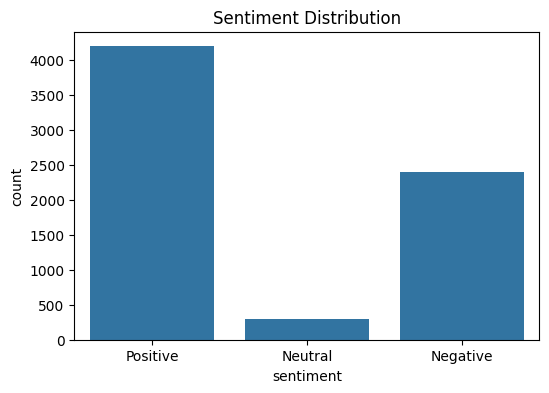

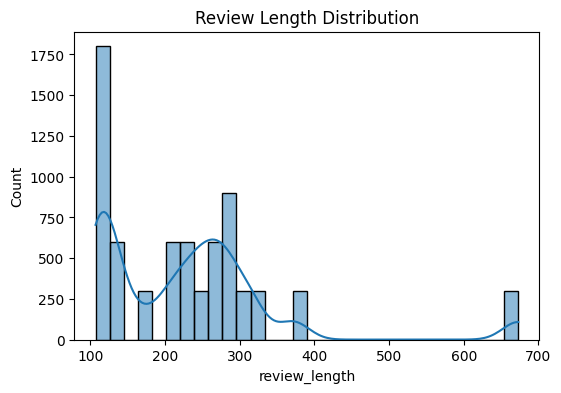


📊 Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       480
     Neutral       1.00      1.00      1.00        60
    Positive       1.00      1.00      1.00       840

    accuracy                           1.00      1380
   macro avg       1.00      1.00      1.00      1380
weighted avg       1.00      1.00      1.00      1380



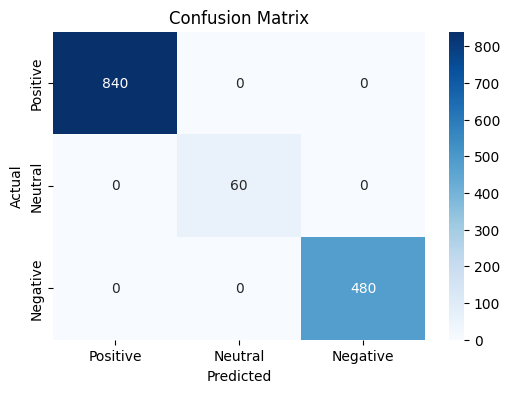

In [2]:
# ========================================
# 📘 Movie Review Sentiment Analysis Pipeline
# ========================================

# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 2️⃣ Load dataset
file_path = "/content/violent_ nature_reviews.csv"
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print("📏 Dataset shape:", df.shape)
print(df.head())

# 3️⃣ Create sentiment column from Ratings
def label_sentiment(rating):
    if rating >= 6:
        return 'Positive'
    elif rating <= 4:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['Ratings'].apply(label_sentiment)
print("\n💬 Unique sentiment values:", df['sentiment'].unique())

# 4️⃣ Exploratory Data Analysis (EDA)
# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', order=['Positive','Neutral','Negative'])
plt.title('Sentiment Distribution')
plt.show()

# Optional: review length distribution
df['review_length'] = df['Comments'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6,4))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Review Length Distribution')
plt.show()

# 5️⃣ Text preprocessing
# For simplicity, we just lowercase text and remove leading/trailing spaces
df['cleaned_comments'] = df['Comments'].str.lower().str.strip()

# 6️⃣ Split dataset into train and test
X = df['cleaned_comments']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7️⃣ Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 8️⃣ Train Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_vec, y_train)

# 9️⃣ Make predictions and evaluate
y_pred = model.predict(X_test_vec)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive','Neutral','Negative'])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Positive','Neutral','Negative'], yticklabels=['Positive','Neutral','Negative'], cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
